In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

#Loading the dataset
df=pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944.0,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083.0,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456.0,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460.0,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482.0,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700.0,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700.0,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010.0,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007.0,Petrol,145,57.7,1.2


# Data health Checkup

1. Completeness Checkup

In [6]:
#Data coverage
num_rows = df.shape[0]
print(num_rows)

17966


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17940.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23366.431494,113.321385,57.906980,1.350807
std,2.050336,4741.343657,19471.130116,62.017770,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9994.250000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18246.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.250000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [96]:
#Missing values
missing_values = df.isnull().sum()
print(missing_values)

model            0
year             0
price            0
transmission    15
mileage         26
fuelType         0
tax              0
mpg              0
engineSize       0
dtype: int64


In [97]:
#feature completeness


**Accuracy checks**

In [8]:
#duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(len(duplicate_rows))


Duplicate Rows:
153


In [99]:
#outliers using IQR
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

column_names = ['mileage','tax','mpg']

for column_name in column_names:
    outliers = find_outliers_iqr(df[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of mileage are 876
The number of outliers of tax are 20
The number of outliers of mpg are 216


In [100]:
#Outliers using Zscore
def find_outliers_zscore(data, threshold=5):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > threshold]
    return outliers

column_names = ['mileage','tax','mpg']

for column_name in column_names:
    outliers = find_outliers_zscore(df[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of mileage are 42
The number of outliers of tax are 12
The number of outliers of mpg are 5


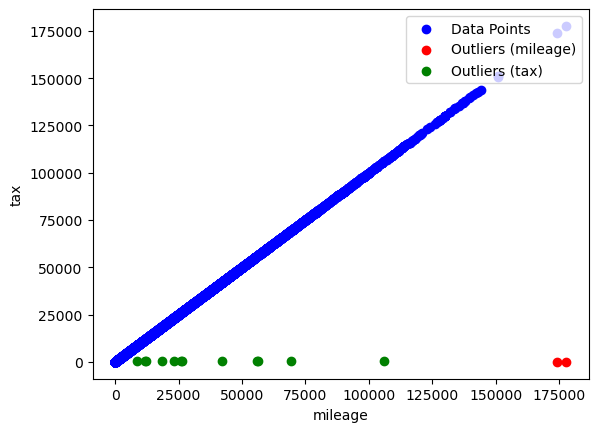

In [14]:
import matplotlib.pyplot as plt

# Function to detect outliers based on Z-score method
def detect_outliers_zscore(data, threshold=7):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Detect outliers in both features
outliers_feature1 = detect_outliers_zscore(df['mileage'])
outliers_feature2 = detect_outliers_zscore(df['tax'])

# Create a scatter plot
plt.scatter(df['mileage'], df['mileage'], c='blue', label='Data Points')
plt.scatter(df['mileage'][outliers_feature1], df['tax'][outliers_feature1], c='red', label='Outliers (mileage)')
plt.scatter(df['mileage'][outliers_feature2], df['tax'][outliers_feature2], c='green', label='Outliers (tax)')

# Set labels and legend
plt.xlabel('mileage')
plt.ylabel('tax')
plt.legend(loc='upper right')

In both methods, the threshold parameter determines the sensitivity of outlier detection. A higher threshold value will capture more outliers, while a lower value will be more conservative.

# Data Preprocessing

In [102]:
len(df)

17966

**Data consistent**

**Convert columns which looks numerical but are categorical**

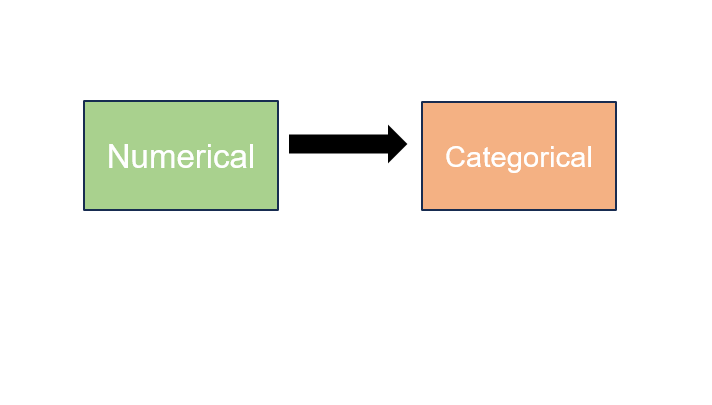

In [18]:
df['engineSize'].value_counts()

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

In [15]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage         float64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [103]:

def convert_to_categorical(df, column_name):
    df[column_name] = df[column_name].astype('category')
    return df

column_name_to_convert = 'year'
df = convert_to_categorical(df, column_name_to_convert)

column_name_to_convert = 'engineSize'
df = convert_to_categorical(df, column_name_to_convert)

-----------------------------------------------------------------------------------------------

**Missing Values**

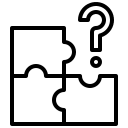

In [ ]:
[1,1.2,1.3,1.4,1.4,5,6.5,4,1,3,33,2,1.5,1.7,1.2,1.2,1,1,1,NaN,1,1,2,3]

In [104]:
#Fill missing values with mean for each numerical column
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


In [105]:
##Fill missing values with mode for each categorical column
categorical_columns = df.select_dtypes(include=['object','category']).columns

for column in categorical_columns:
    if df[column].isnull().any():
        # Replace missing values with the mean of the column
        df[column].fillna(df[column].mode()[0], inplace=True)


In [106]:
#check if null values are there anymore
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

-----------------------------------------------------------------------------------------------

**Remove duplicates from the entire DataFrame**

In [107]:
df_no_duplicates = df.drop_duplicates()

-----------------------------------------------------------------------------------------------

**Removing Outliers**

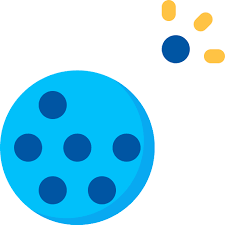

In [108]:
column_names = ['mileage','tax','mpg']

for column_name in column_names:
    outliers = find_outliers_zscore(df[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of mileage are 42
The number of outliers of tax are 12
The number of outliers of mpg are 5


In [109]:
#The Z-score method removes data points that fall
#above or below a specified number of standard deviations from the mean.
#removing outliers
from scipy import stats

In [110]:
z_scores = np.abs(stats.zscore(df[column_names]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)
outlier_indices = np.unique(outlier_indices[0])
df_cleaned = df.drop(df.index[outlier_indices])
df = df_cleaned
print(df)

         model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic  15944.0   Petrol  150  57.7   
1        Focus  2018  14000       Manual   9083.0   Petrol  150  57.7   
2        Focus  2017  13000       Manual  12456.0   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual  10460.0   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic   1482.0   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual  16700.0   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual  40700.0   Petrol   30  57.7   
17963    Focus  2015   9999       Manual   7010.0   Diesel   20  67.3   
17964       KA  2018   8299       Manual   5007.0   Petrol  145  57.7   
17965    Focus  2015   8299       Manual   5007.0   Petrol   22  57.7   

      engineSize  
0            1.0  
1            1.0  
2            1.0  
3            1.5  
4            1.0  
...      

In [111]:
missing_values = df.isnull().sum()
print(missing_values)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


-----------------------------------------------------------------------------------------------

**Standardisation for Data Consistency**

In [112]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

scaler = StandardScaler()
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df)


         model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic  15944.0   Petrol  150  57.7   
1        Focus  2018  14000       Manual   9083.0   Petrol  150  57.7   
2        Focus  2017  13000       Manual  12456.0   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual  10460.0   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic   1482.0   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual  16700.0   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual  40700.0   Petrol   30  57.7   
17963    Focus  2015   9999       Manual   7010.0   Diesel   20  67.3   
17964       KA  2018   8299       Manual   5007.0   Petrol  145  57.7   
17965    Focus  2015   8299       Manual   5007.0   Petrol   22  57.7   

      engineSize  
0            1.0  
1            1.0  
2            1.0  
3            1.5  
4            1.0  
...      

In [113]:
len(df)

17489

-----------------------------------------------------------------------------------------------

# EDA

**Measures of Dispersion**

In [114]:
df.describe()

,price,mileage,tax,mpg
count,17489.000000,17489.000000,17489.000000,17489.000000
mean,12368.849448,21885.997611,112.961690,57.877003
std,4501.889628,16275.668022,59.952741,9.396118
min,795.000000,1.000000,0.000000,28.800000
25%,9199.000000,9892.000000,30.000000,52.300000
50%,11440.000000,17918.000000,145.000000,58.900000
75%,15395.000000,30149.000000,145.000000,65.700000
max,54995.000000,81621.000000,290.000000,85.600000


**Data Distribution(Univariate Analysis)**

In [115]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['model', 'year', 'transmission', 'fuelType', 'engineSize'], dtype='object')

In [116]:
def univariate_categorical_analysis(df, column):
   
    print("Frequency count for", column)
    print(df[column].value_counts())
    print()

    print("Percentage distribution for", column)
    print(df[column].value_counts(normalize=True) * 100)
    print()
    
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Bar Plot: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


1.Model

Frequency count for model
 Fiesta                   6420
 Focus                    4480
 Kuga                     2198
 EcoSport                 1143
 Ka+                       530
 C-MAX                     521
 Mondeo                    441
 B-MAX                     355
 S-MAX                     280
 Grand C-MAX               244
 Galaxy                    215
 Edge                      208
 KA                        190
 Puma                       79
 Tourneo Custom             69
 Grand Tourneo Connect      56
 Tourneo Connect            32
 Mustang                    12
 Fusion                     11
 Streetka                    2
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

Percentage distribution for model
 Fiesta                   36.708788
 Focus                    25.616102
 Kuga                     12.567900
 EcoSport                  6.535537
 Ka+                       3.030476
 C-MAX              

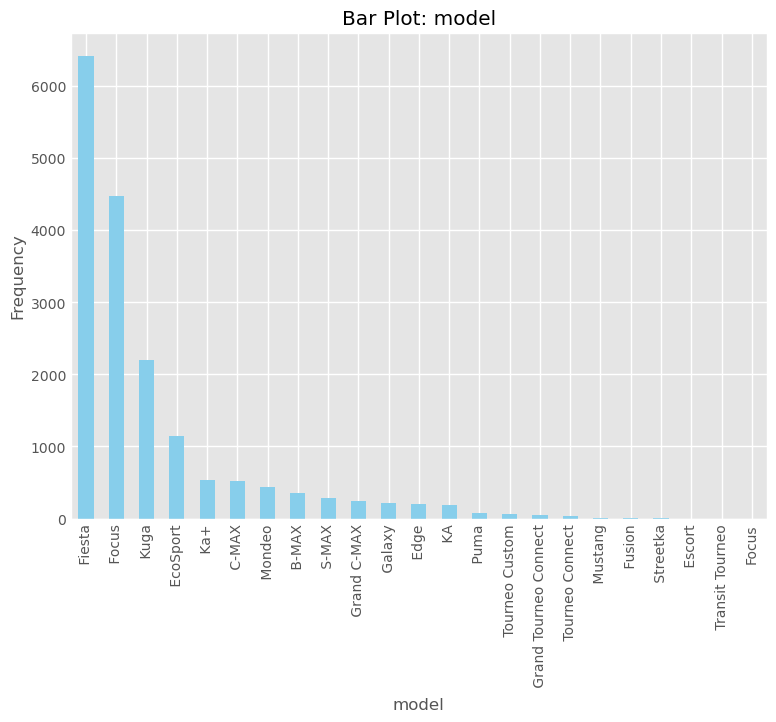

In [117]:
univariate_categorical_analysis(df, 'model')

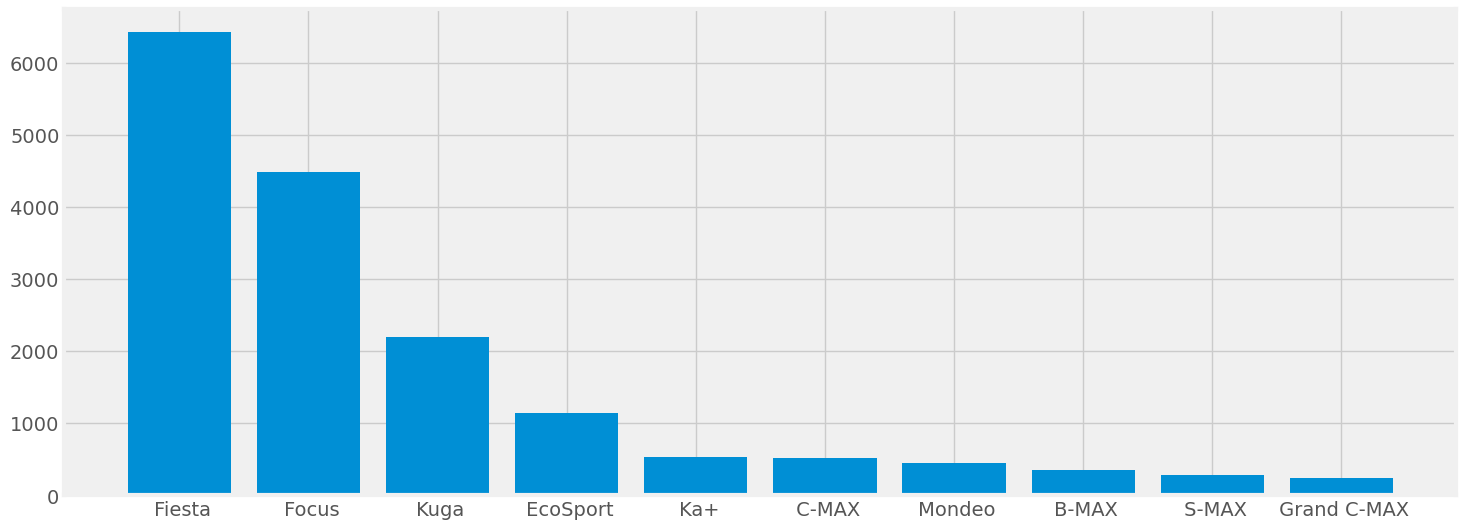

In [118]:
model_counts=df["model"].value_counts()
top10=model_counts[0:10]
plt.figure(figsize=(16,6))
plt.style.use("fivethirtyeight")
plt.bar(top10.index,top10.values)
plt.show()

We can see the top 10 models here.

--------------------------------------------------------------------------------------------------------

Year

Frequency count for year
2017    4846
2018    3978
2019    3179
2016    2262
2015    1308
2014     785
2013     583
2020     245
2012      94
2011      65
2009      52
2010      31
2008      29
2007      14
2006       6
2005       5
2004       2
1996       1
1998       1
2002       1
2000       1
2060       1
2003       0
Name: year, dtype: int64

Percentage distribution for year
2017    27.708846
2018    22.745726
2019    18.177140
2016    12.933844
2015     7.478987
2014     4.488536
2013     3.333524
2020     1.400881
2012     0.537481
2011     0.371662
2009     0.297330
2010     0.177254
2008     0.165819
2007     0.080050
2006     0.034307
2005     0.028589
2004     0.011436
1996     0.005718
1998     0.005718
2002     0.005718
2000     0.005718
2060     0.005718
2003     0.000000
Name: year, dtype: float64



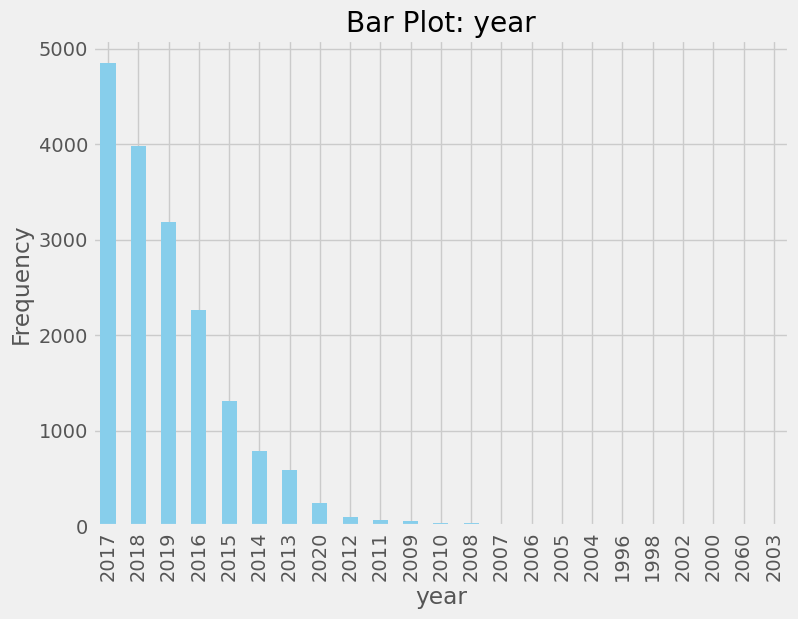

In [119]:
univariate_categorical_analysis(df, 'year')

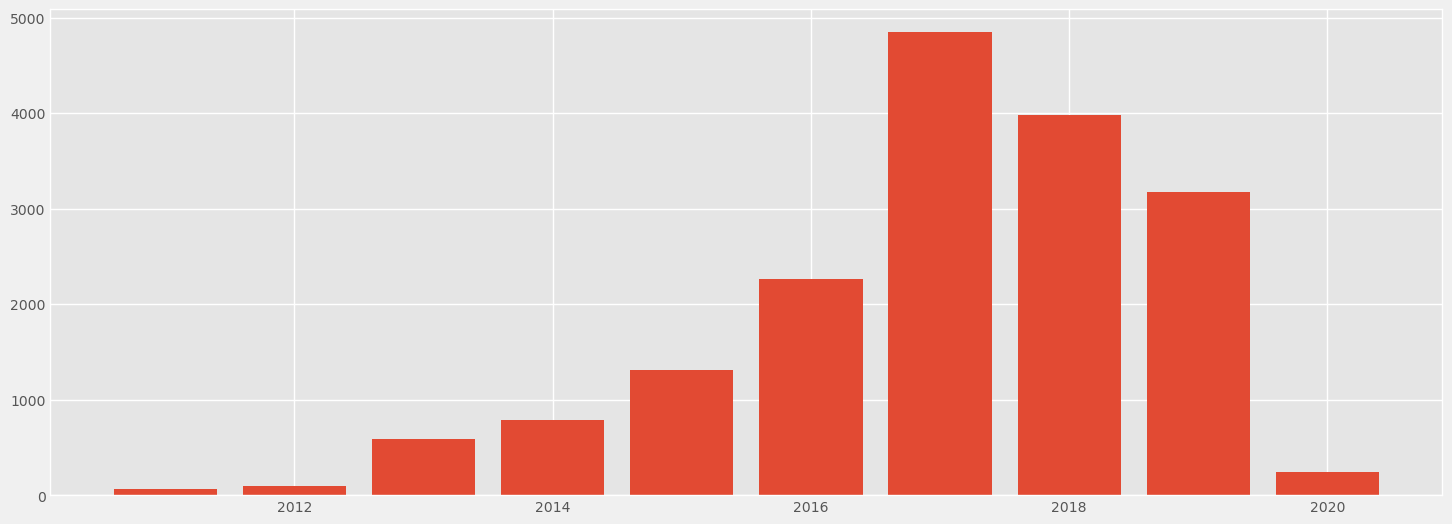

In [120]:
year_counts=df['year'].value_counts()
year10=year_counts[0:10]
plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.bar(year10.index,year10.values)
plt.show()

Top 10years count

--------------------------------------------------------------------------------------------------------

Frequency count for transmission
Manual       15111
Automatic     1311
Semi-Auto     1067
Name: transmission, dtype: int64

Percentage distribution for transmission
Manual       86.402882
Automatic     7.496140
Semi-Auto     6.100978
Name: transmission, dtype: float64



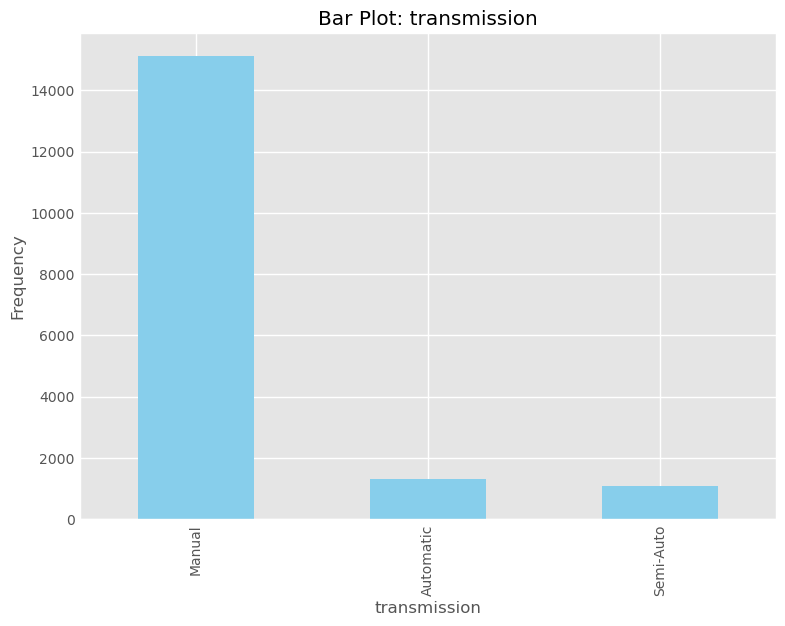

In [121]:
univariate_categorical_analysis(df, 'transmission')

Frequency count for fuelType
Petrol      11998
Diesel       5473
Hybrid         15
Electric        2
Other           1
Name: fuelType, dtype: int64

Percentage distribution for fuelType
Petrol      68.603122
Diesel      31.293956
Hybrid       0.085768
Electric     0.011436
Other        0.005718
Name: fuelType, dtype: float64



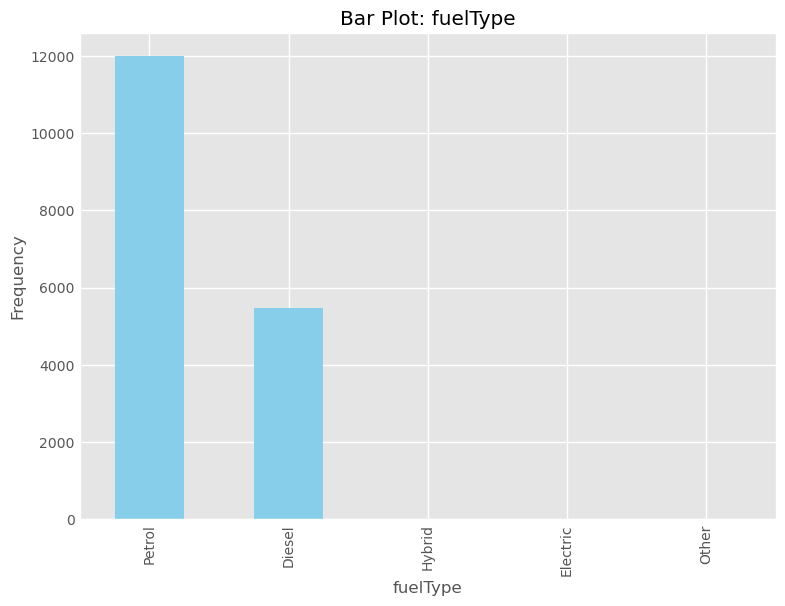

In [122]:
univariate_categorical_analysis(df, 'fuelType')

Frequency count for engineSize
1.0    7756
1.5    3306
2.0    3190
1.2    1602
1.6     829
1.1     559
1.4      88
2.3      76
0.0      50
1.8      13
1.3      11
2.2       8
5.0       1
1.7       0
2.5       0
3.2       0
Name: engineSize, dtype: int64

Percentage distribution for engineSize
1.0    44.347876
1.5    18.903311
2.0    18.240037
1.2     9.160043
1.6     4.740122
1.1     3.196295
1.4     0.503173
2.3     0.434559
0.0     0.285894
1.8     0.074332
1.3     0.062897
2.2     0.045743
5.0     0.005718
1.7     0.000000
2.5     0.000000
3.2     0.000000
Name: engineSize, dtype: float64



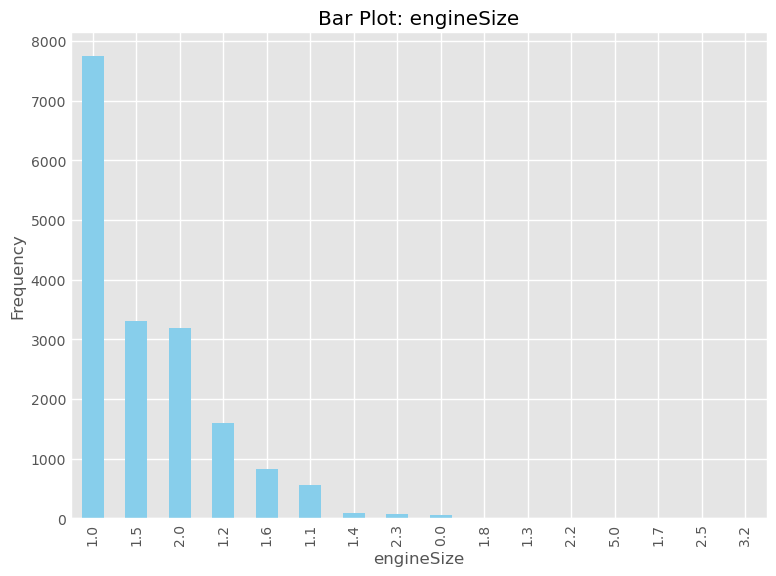

In [123]:
univariate_categorical_analysis(df, 'engineSize')

-----------------------------------------------------------------------------------------------

In [124]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['price', 'mileage', 'tax', 'mpg'], dtype='object')

In [125]:
def univariate_numerical_analysis(df, column):
    # Measures of central tendency
    print("Measures of central tendency for", column)
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Mode:", df[column].mode().values[0])
    print()

    # Measures of dispersion
    print("Measures of dispersion for", column)
    print("Standard Deviation:", df[column].std())
    print("Range:", df[column].max() - df[column].min())
    print()

    # Histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='lightcoral', edgecolor='black')
    plt.title("Histogram: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Measures of central tendency for price
Mean: 12368.849448224599
Median: 11440.0
Mode: 10000

Measures of dispersion for price
Standard Deviation: 4501.889627556245
Range: 54200



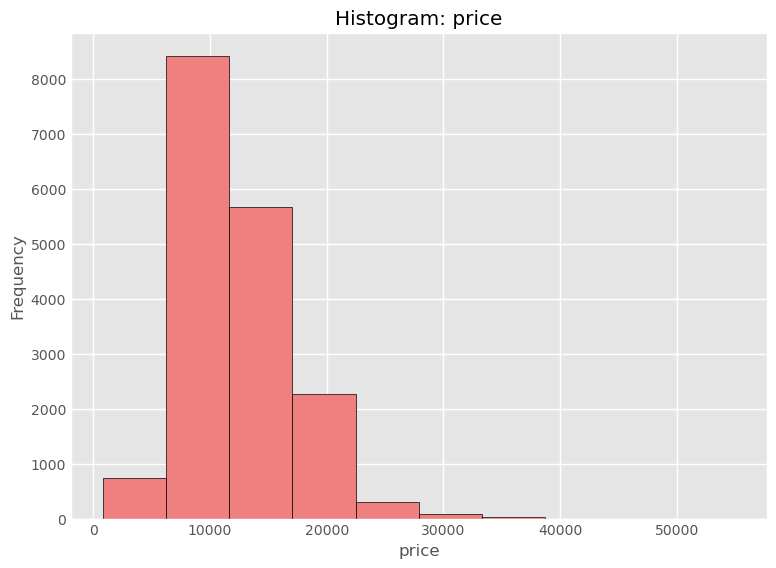

In [126]:
univariate_numerical_analysis(df, 'price')

In [127]:
# Here we can see that Price goes into Negative,hence we need to remove the negative values

In [128]:
# df=df[df['price'] >= 0]

--------------------------------------------------------------------------------

Measures of central tendency for mileage
Mean: 21885.99761100352
Median: 17918.0
Mode: 10.0

Measures of dispersion for mileage
Standard Deviation: 16275.668021590802
Range: 81620.0



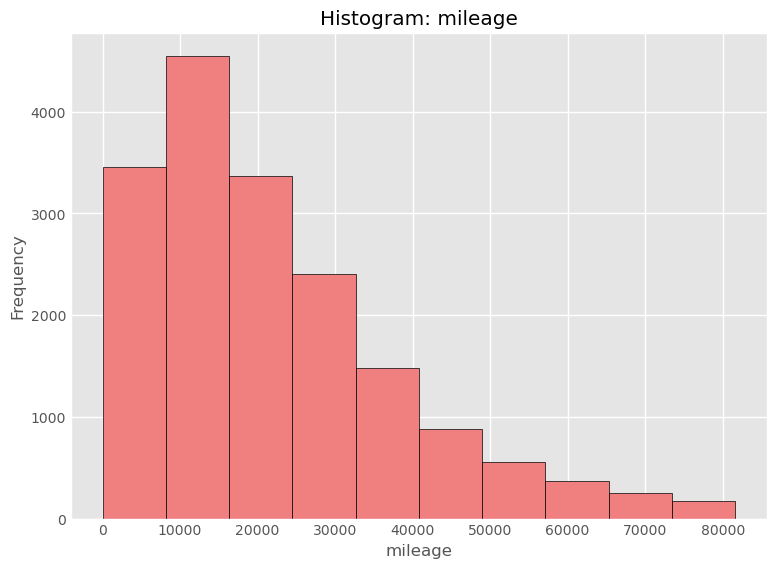

In [129]:
univariate_numerical_analysis(df, 'mileage')

Here we can see that Mileage goes into Negative,hence we need to remove the negative values

In [130]:
df=df[df['mileage'] >= 0]

--------------------------------------------------------------------------------

Measures of central tendency for tax
Mean: 112.96169020527188
Median: 145.0
Mode: 145

Measures of dispersion for tax
Standard Deviation: 59.95274058106985
Range: 290



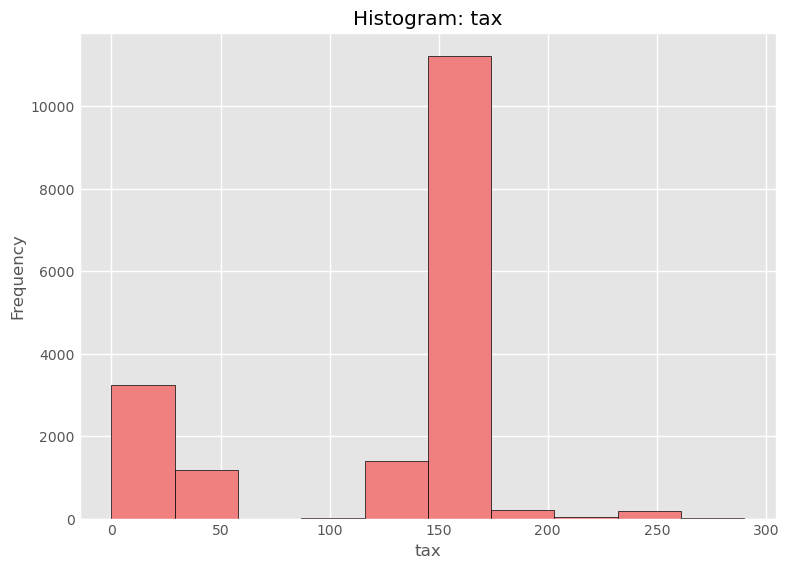

In [131]:
univariate_numerical_analysis(df, 'tax')

Here we can see that tax goes into Negative,hence we need to remove the negative values


In [132]:
df=df[df['tax'] >= 0]

--------------------------------------------------------------------------------

Measures of central tendency for mpg
Mean: 57.8770026874037
Median: 58.9
Mode: 65.7

Measures of dispersion for mpg
Standard Deviation: 9.396118210440152
Range: 56.8



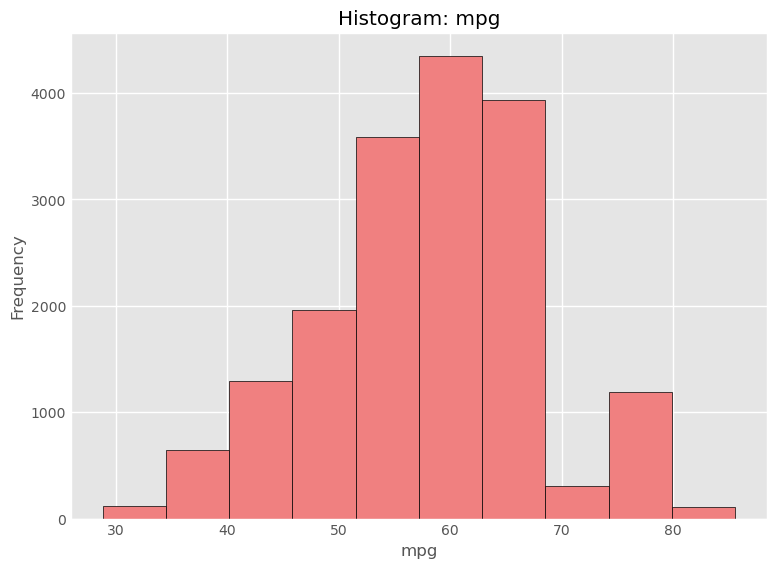

In [133]:
#miles per gallon
univariate_numerical_analysis(df, 'mpg')

-----------------------------------------------------------------------------------------------

**Correlation Analysis**

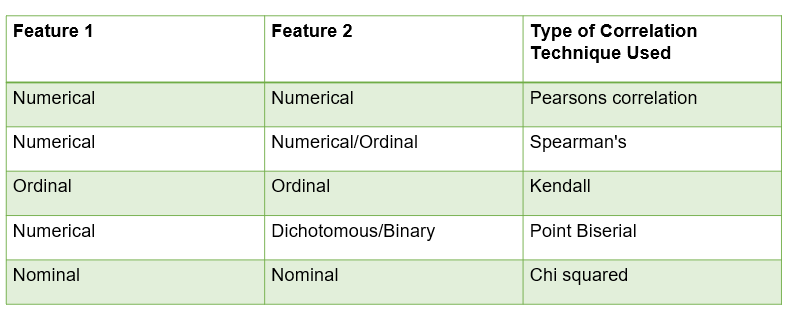

**1.Pearsons correlation**
1. Between features and label
2. Between a feature and another feature

In [134]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['price', 'mileage', 'tax', 'mpg'], dtype='object')

In [135]:
import scipy.stats
x = df['mileage']
y = df['price']
pearsoncorr=scipy.stats.pearsonr(x, y)    
pearsoncorr

PearsonRResult(statistic=-0.5182146862114633, pvalue=0.0)

In [136]:
import scipy.stats
x = df['tax']
y = df['price']
pearsoncorr=scipy.stats.pearsonr(x, y)    
pearsoncorr

PearsonRResult(statistic=0.4428874360761434, pvalue=0.0)

In [137]:
import scipy.stats
x = df['mpg']
y = df['price']
pearsoncorr=scipy.stats.pearsonr(x, y)    
pearsoncorr

PearsonRResult(statistic=-0.38031731259505164, pvalue=0.0)

In all we can see negative correlation

**Heat Map**

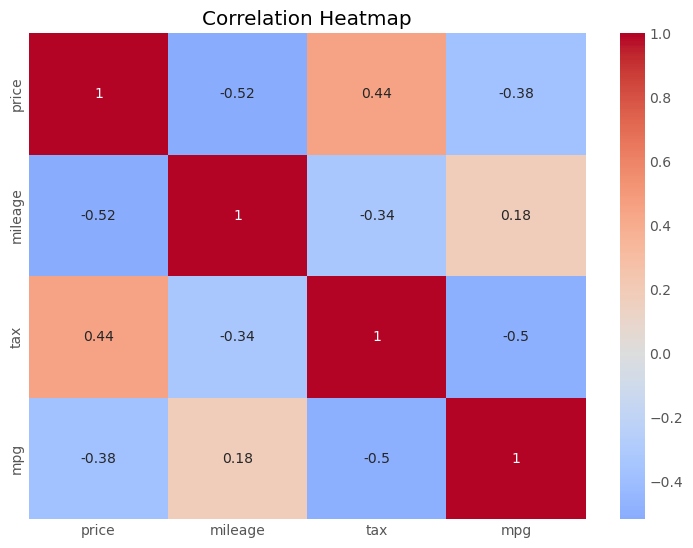

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

Here we can see the correlation is less

**2.spearman**

In [139]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['model', 'year', 'transmission', 'fuelType', 'engineSize'], dtype='object')

In [140]:
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [141]:
#model
df['Categorical_Encoded'] = label_encoder.fit_transform(df['model'])

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(df['price'], df['model'])

print("Spearman's rank correlation:", correlation)
print("P-value:", p_value)

Spearman's rank correlation: 0.35203813871946904
P-value: 0.0


In [142]:
#year
df['Categorical_Encoded'] = label_encoder.fit_transform(df['year'])

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(df['price'], df['year'])

print("Spearman's rank correlation:", correlation)
print("P-value:", p_value)

Spearman's rank correlation: 0.6920420668158702
P-value: 0.0


Positive correlation and since p value is 0  correlation is statistically significant, 

In [143]:
df['Categorical_Encoded'] = label_encoder.fit_transform(df['transmission'])

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(df['price'], df['transmission'])

print("Spearman's rank correlation:", correlation)
print("P-value:", p_value)

Spearman's rank correlation: -0.06608492978797595
P-value: 2.163882296802904e-18


In [144]:
df['Categorical_Encoded'] = label_encoder.fit_transform(df['fuelType'])

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(df['price'], df['fuelType'])

print("Spearman's rank correlation:", correlation)
print("P-value:", p_value)

Spearman's rank correlation: -0.23049478183923724
P-value: 1.3208496220180982e-209


Negative correlation

In [145]:
df['Categorical_Encoded'] = label_encoder.fit_transform(df['engineSize'])

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(df['price'], df['engineSize'])

print("Spearman's rank correlation:", correlation)
print("P-value:", p_value)

Spearman's rank correlation: 0.23119287766651353
P-value: 6.711041900724041e-211


Statistically not much significant

# Bivariate Analysis

**Price of car each year**

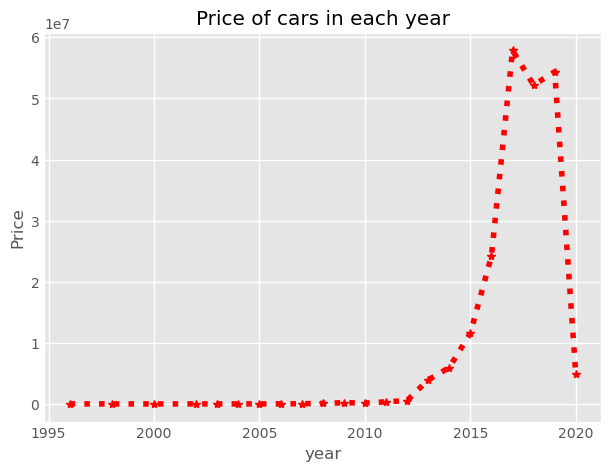

In [146]:
b=df.groupby('year')['price'].sum().reset_index()
b1=b.sort_values(by='year')
b1=b1.drop(22)

x=b1['year']
y=b1['price']
plt.plot(x,y,"*:r")
plt.xlabel("year")
plt.ylabel("Price")
plt.title("Price of cars in each year")
plt.show()

**Transmission percentage in terms of Automatic, Semi Automatic and Manual**

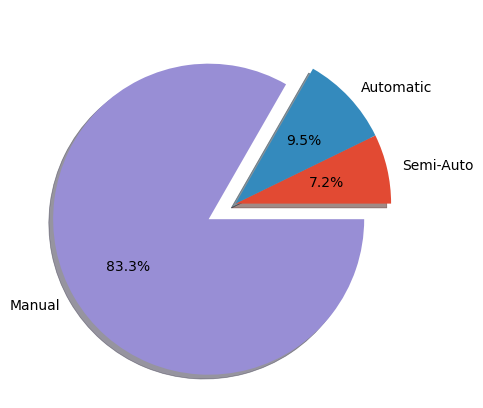

In [147]:
c=df.groupby('transmission')['price'].sum().reset_index()
c1=c.sort_values(by='price')
y=c1['price']
labels=['Semi-Auto','Automatic','Manual']
myexplode=[0,0,0.2]
plt.pie(y,labels=labels,explode = myexplode,shadow=True,autopct='%1.1f%%')
plt.show()

**The tax on each Fuel type is analysed**

In [148]:
import plotly.express as px

d=df.groupby('fuelType')['tax'].sum().reset_index()
d1=d.sort_values(by='tax')
size=[200, 400, 600, 800, 1000]
color=[1, 2, 3, 4, 5]
px.scatter(d1, x='fuelType', y='tax',size=size, color=color)

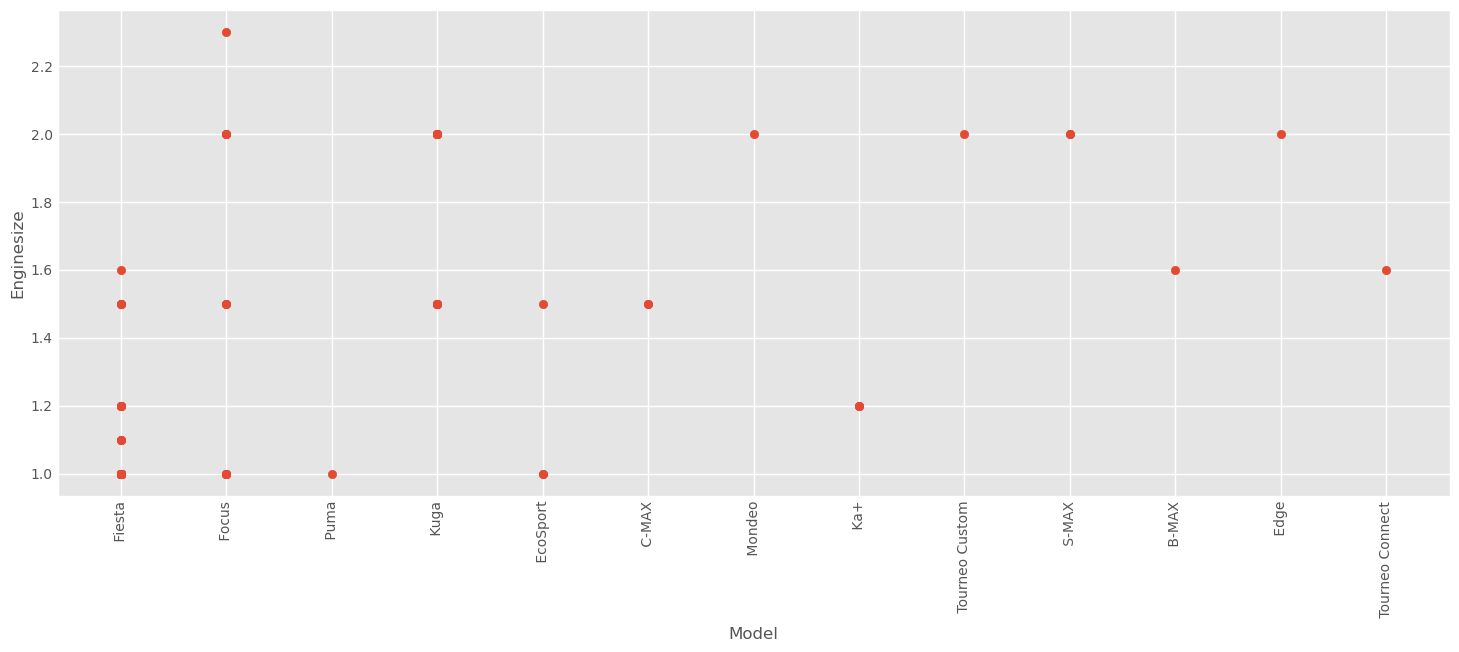

In [149]:
plt.figure(figsize=(16,6))
plt.scatter(df["model"].iloc[0:100],df["engineSize"].iloc[0:100])
plt.xlabel("Model")
plt.ylabel("Enginesize")
plt.xticks(rotation=90)
plt.show()

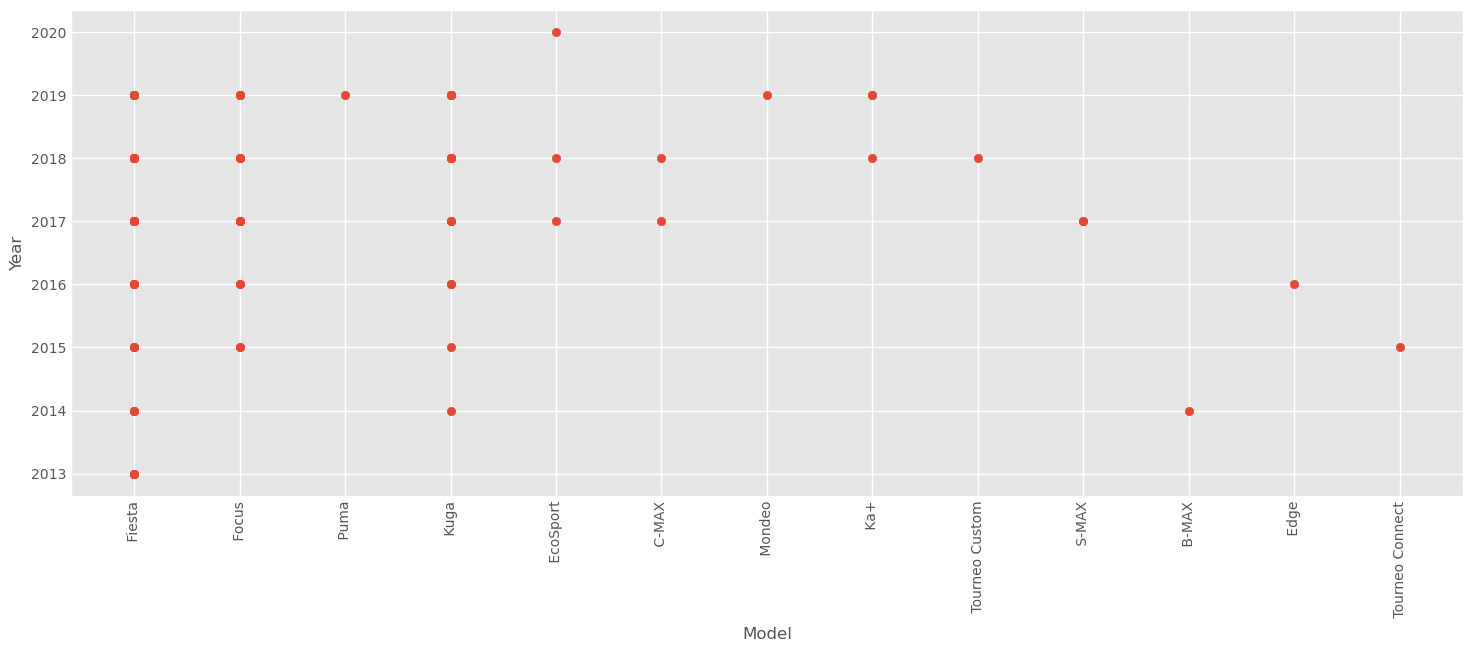

In [150]:
plt.figure(figsize=(16,6))
plt.scatter(df["model"].iloc[0:100],df["year"].iloc[0:100])
plt.xlabel("Model")
plt.ylabel("Year")
plt.xticks(rotation=90)
plt.show()

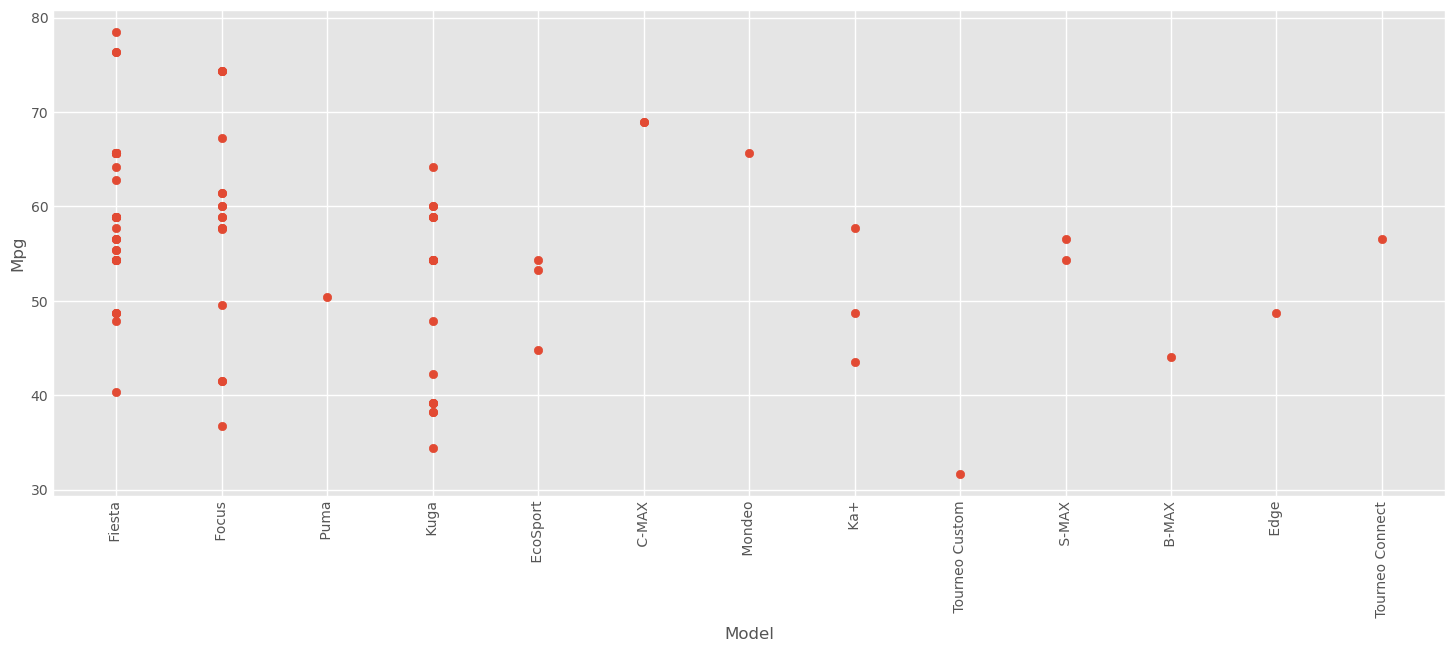

In [151]:
plt.figure(figsize=(16,6))
plt.scatter(df["model"].iloc[0:100],df["mpg"].iloc[0:100])
plt.xlabel("Model")
plt.ylabel("Mpg")
plt.xticks(rotation=90)
plt.show()

-----------------------------------------------------------------------------------------------

In [152]:
df_new_for_exp=df

# Feature Engineering

One hot encoding

In [153]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [154]:
df_encoded=pd.get_dummies(df,columns=["model","transmission","fuelType"],drop_first=True)

In [155]:
df_encoded

,year,price,mileage,tax,mpg,engineSize,Categorical_Encoded,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944.0,150,57.7,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083.0,150,57.7,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456.0,150,57.7,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460.0,145,40.3,1.5,6,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482.0,145,48.7,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700.0,150,47.1,1.4,5,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,7499,40700.0,30,57.7,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,9999,7010.0,20,67.3,1.6,7,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,8299,5007.0,145,57.7,1.2,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [156]:
df_encoded

,year,price,mileage,tax,mpg,engineSize,Categorical_Encoded,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944.0,150,57.7,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083.0,150,57.7,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456.0,150,57.7,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460.0,145,40.3,1.5,6,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482.0,145,48.7,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700.0,150,47.1,1.4,5,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,7499,40700.0,30,57.7,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,9999,7010.0,20,67.3,1.6,7,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,8299,5007.0,145,57.7,1.2,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Splitting the feature and label

In [157]:
x=df_encoded.drop(columns=["price"])
y=df_encoded['price']

In [158]:
x

,year,mileage,tax,mpg,engineSize,Categorical_Encoded,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944.0,150,57.7,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083.0,150,57.7,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456.0,150,57.7,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460.0,145,40.3,1.5,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482.0,145,48.7,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700.0,150,47.1,1.4,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700.0,30,57.7,1.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010.0,20,67.3,1.6,7,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007.0,145,57.7,1.2,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Train Test Split

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=12)

In [160]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [161]:
y_pred=model.predict(x_test)

In [162]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 1325.5090427813304
mean squared error: 3016618.6342385
root mean squared error: 1736.84156854864
r2-score: 0.847940438371582


# Trying to improve Score through regularisation

**TEST 1: Tried regularisation and label encoding**

In [163]:
#Label encoding and testing, score fell
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge

labelencoder = LabelEncoder()
df1=df

df1['model'] = labelencoder.fit_transform(df1['model'])
df1['transmission'] = labelencoder.fit_transform(df1['transmission'])
df1['fuelType'] = labelencoder.fit_transform(df1['fuelType'])

x=df1.drop(columns=["price"])
y=df1['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=12)
alpha = 1.0  
reg = Ridge(alpha=alpha)
model = reg.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 1325.5090427813304
mean squared error: 3016618.6342385
root mean squared error: 1736.84156854864
r2-score: 0.847940438371582


Score dropped, hence not considering it

**Tried Regularisation and one hot encoding**

In [164]:
df2=df_encoded

In [165]:
x=df2.drop(columns=["price"])
y=df2['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=12)
alpha = 1.0  
reg = Ridge(alpha=alpha)
model = reg.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [166]:
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 1325.5090427813304
mean squared error: 3016618.6342385
root mean squared error: 1736.84156854864
r2-score: 0.847940438371582


**Tried Regularisation and feature selection**

In [167]:
df3=df_encoded
X=df2.drop(columns=["price"])
y=df2['price']

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)


                        Variable         VIF
0                           year  562.385036
1                        mileage    3.662224
2                            tax    7.221864
3                            mpg  185.276377
4                     engineSize  420.229487
5            Categorical_Encoded   95.954861
6                   model_ C-MAX    2.542106
7                model_ EcoSport    4.449676
8                    model_ Edge    1.872969
9                  model_ Escort    1.004070
10                 model_ Fiesta   19.972062
11                  model_ Focus   14.008385
12                 model_ Fusion    1.038208
13                 model_ Galaxy    1.775795
14            model_ Grand C-MAX    1.758809
15  model_ Grand Tourneo Connect    1.197704
16                     model_ KA    1.554943
17                    model_ Ka+    2.566714
18                   model_ Kuga    8.531450
19                 model_ Mondeo    2.465937
20                model_ Mustang    1.054082
21        

dropping features with high vif score

In [169]:
new_df=df.drop({'year',"engineSize","mpg"},axis=1)
new_df

,model,price,transmission,mileage,fuelType,tax,Categorical_Encoded
0,5,12000,0,15944.0,4,150,1
1,6,14000,1,9083.0,4,150,1
2,6,13000,1,12456.0,4,150,1
3,5,17500,1,10460.0,4,145,6
4,5,16500,0,1482.0,4,145,1
...,...,...,...,...,...,...,...
17961,0,8999,1,16700.0,4,150,5
17962,0,7499,1,40700.0,4,30,1
17963,6,9999,1,7010.0,0,20,7
17964,11,8299,1,5007.0,4,145,3


In [171]:
X=new_df.drop(columns=["price"])
y=new_df['price']

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=12)
alpha = 2.0  
reg = Ridge(alpha=alpha)
model = reg.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 1325.5090427813304
mean squared error: 3016618.6342385
root mean squared error: 1736.84156854864
r2-score: 0.847940438371582
